# Espacio de Fases

Esta primera Notebook tiene como proposito presentar alguno de los sistemas que vimos en clase, calcular trayectorias (u orbitas) en el espacio de fases y estudiar como varian a medida que modificamos loa parametros del sistema. Vamos a presentar alguna de las herramientas que vamos a usar durante el curso, por ejemplo para integrar numericamente las ecuaciones diferenciales, graficar sus soluciones y usar interaccion para modificar los parametros y observar como cambian las soluciones en tiempo real.



In [1]:
using Interact, Plots, DifferentialEquations

WebIO._IJuliaInit()

# Oscilador armonico
Sistema lineal que depende de un solo parametro K

Ecuaciones diferenciales de primer orden lineales correspondientes al oscilador armonico.
$x$ corresponde a la posicion del oscilador  e $y$ a su velocidad.

$ \dot{x} = y $ 

$\dot{y} = -Kx$

La primera ecuacion solo especifica que la variacion temporal de la posicion corresponde a la velocidad. 

La segunda ecuacion, que proviene de la segunda Ley de Newton combinada con la Ley de Hooke especifica que la variacion de la velocidad (aceleracion) es propocional a la posicion con una constante $K>0$ y signo negativo

Si bien esta ecuación tiene solución analítica, vamos a integrarla numericamente usando el paquete **DifferentialEquations** de Julia. 

Para ello tenemos que definir primero la funcion que da las derivadas $du$ en function de las variables $u$ ($x=u[1]$, $y=u[2]$) y los parametros $p$, en este caso tenemos un unico parametro $K$ y podemos usar ese nombre pero de forma general vamos a tener un vector de parametros $p$.

In [45]:
function oscharm!(du,u,K,t)
    du[1] = u[2]
    du[2] = -K*u[1]
end    

oscharm! (generic function with 1 method)

esta funcion en Julia se escribe con el bang **!** porque modifica sus argumentos (en este caso $du$)

## Calculo de las trayectorias
Luego tenemos que definir:
- una condicion inicial **u0** 
- un valor para el parámetro 
- un time span **tspan** (tiempo inicial y final)

con lo cual queda definido el problema **prob**

In [46]:
u0 = [1.0;1.0]
K = 0.3
tspan = (0,100.0)
prob = ODEProblem(oscharm!, u0, tspan, K)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: 2-element Vector{Float64}:
 1.0
 1.0

Para resolver simplemente apelamos a la funcion **solve** y guardamos la solucion en **sol**

In [47]:
sol = solve(prob);

Finalmente graficamos la solucion en funcion del tiempo, y en el espacio de fases

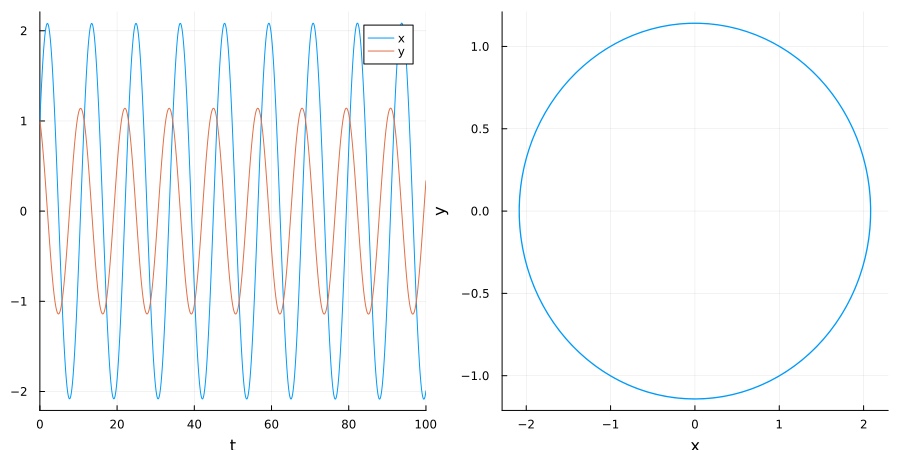

In [5]:
p1 = plot(sol,labels=["x" "y"])
p2 = plot(sol,idxs=(1,2),labels="",xlabel="x",ylabel="y")
plot(p1,p2,layout=(1,2),size = (900,450))

## Interacción

Usando el macro @manipulate podemos generar un grafico interactivo

In [6]:
@manipulate throttle=.05 for x0=-1:0.1:1,y0=-1:0.1:1,tmax=10:10:200,K=0:.1:3.0
    prob = ODEProblem(oscharm!, [x0; y0], (0, tmax), K)
    sol = solve(prob);
    p1 = plot(sol,labels=["x" "y"])
    p2 = plot(sol,idxs=(1,2),label="",xlabel="x",ylabel="y")
    scatter!(p2,[prob.u0[1]],[prob.u0[2]],label="(x0,y0)")
    plot(p1,p2,layout=(1,2),size=(900,450))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["x0"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000856a1370, Task (runnable) @0x00000000856a1370), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"name

## Oscilador armonico con disipación

Ahoera vamos a agregar un termino que de cuenta de la disipación de energia que en su forma mas simple aparece como una fuerza con el signo contrario a la velocidad $y$ con una constante de proporcionalidad positiva $C$ y que se aplica a la segunda ecuación (Ley de Newton)

$ \dot{x} = y $ 

$\dot{y} = -Kx -Cy$

Notar que ahora como tenemos dos parametros vamos a introducirlos en la funcion como un vector $p=[K,C]$, y para mayuor claridad de notación hacemos un "unpack" de ese vector de parametros en la primera linea. El resto es igual.

In [7]:
function oscharmdamp!(du,u,p,t)
    (K,C) = p
    du[1] = u[2]
    du[2] = -K*u[1]-C*u[2]
end    

oscharmdamp! (generic function with 1 method)

In [8]:
@manipulate throttle=.05 for x0=-1:0.1:1,y0=-1:0.1:1,tmax=10:10:200,K=0:.1:3.0,C=0:.02:1.0
    prob = ODEProblem(oscharmdamp!, [x0; y0], (0, tmax), [K,C])
    sol = solve(prob);
    p1 = plot(sol,labels=["x" "y"])
    p2 = plot(sol,idxs=(1,2),label="",xlabel="x",ylabel="y")
    scatter!(p2,[prob.u0[1]],[prob.u0[2]],label="(x0,y0)")
    plot(p1,p2,layout=(1,2),size = (900,450))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["x0"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000a26c5e0, Task (runnable) @0x000000000a26c5e0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"name

## Animacion

Usando el macro @animate podemos hacer un gif animado de la evolucion del sistema

In [9]:
N = 100; dt = 0.5
sol = solve(ODEProblem(oscharmdamp!, [0.8; 0.8], (0, N*dt), [0.8,0.2]))
p1 = plot(sol,idxs=(1,2),tspan=(0,dt),color=:black,xlims=(-1,1),ylims=(-1,1),legend=false,size=(400,400));
anim = @animate for n=2:N
    plot!(p1,sol,idxs=(1,2),tspan=((n-1)*dt,n*dt),color=:black);
end;

┌ Info: Saved animation to 
│   fn = C:\Users\Camilo\NonLinearDynamicsCourse\Lectures\Part_I\oscharmdamp_anim_fps30.gif
└ @ Plots C:\Users\Camilo\.julia\packages\Plots\AAjgN\src\animation.jl:139


Plots.AnimatedGif("C:\\Users\\Camilo\\NonLinearDynamicsCourse\\Lectures\\Part_I\\oscharmdamp_anim_fps30.gif")
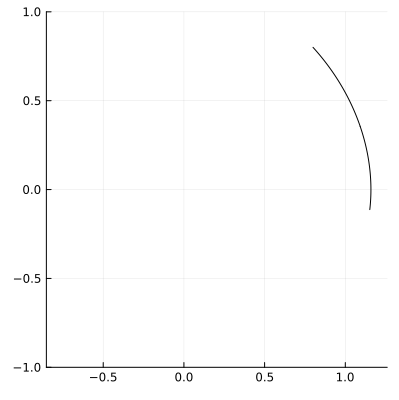

In [10]:
gif(anim, "oscharmdamp_anim_fps30.gif", fps = 30)

# Bouncing Ball

Este sistema es mas simple que el anterior porque si hacemos que $x$ se la altura de la pelota e $y$ su aceleracion, una pelota que cae por la acción de la gravedad se puede escribir simplemente 

$ \dot{x} = y $ 

$\dot{y} = -g$

la aceleracion es constante y negativa ($g=9.8$). 

Sin embargo, tenemos que agregar una condicion de rebote en el piso. Vamos a considerar dos casos: Rebote elastico (Ball Soft) y rebote rigido (Ball Hard). 

Para el caso del rebote elastico asumimos que cuando la altura llega a cero colisiona con un resorte de constante elastica $K$ que lo hace ir de vuelta hacia arriba (en este la pelota puede tomar valores negativos porque se deforma), esto implica que tenemos que evaluar el signo de $x$ y aplicar solo la aceleracion de la gravedad para $x>0$ y la gravedad mas la accion del resorte para $x<0$, esto implica una discontinuidad en el "campo vector" algo que no se lleva muy bien con los metodos de integracion numerica pero que en este caso Julia resuelve bastante bien:

$ \dot{x} = y $ 

$\dot{y} = -g$  [si $x>0$]

$ = -g-K*y$  [si $x<=0$]

In [11]:
function ballsoft!(du,u,p,t)
    (g,K) = p
    du[1] = u[2]
    if (u[1]>0)
        du[2] = -g
    else
        du[2] = -g-K*u[1]
    end      
end

ballsoft! (generic function with 1 method)

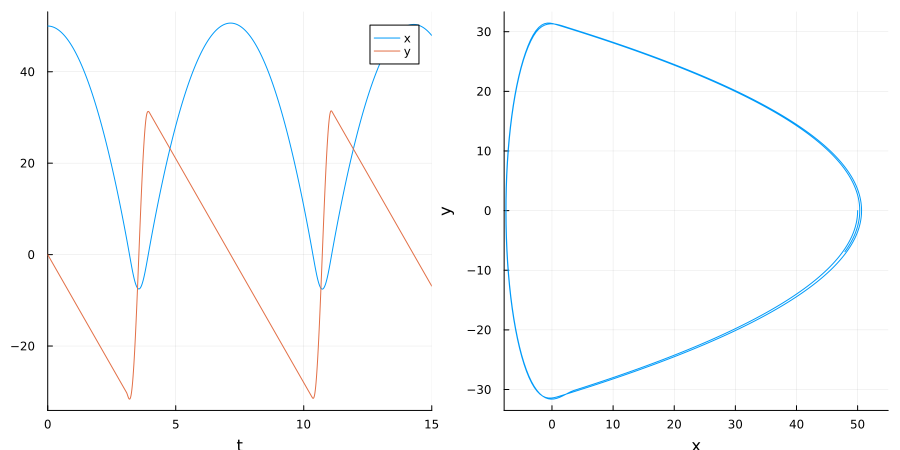

In [12]:
u0 = [50.0,0.0]
tspan = (0.0,15.0)
p = [9.8, 20.0]
prob = ODEProblem(ballsoft!,u0,tspan,p)
sol = solve(prob)
p1 = plot(sol,labels=["x" "y"])
p2 = plot(sol,idxs=(1,2),label="",xlabel="x",ylabel="y")
plot(p1,p2,layout=(1,2),size = (900,450))

## Caso hard usando callback

El paquete DifferentialEquations permite introducir llamadas (callbacks) al integrador cuando se produce cierta condición y afectar entonces los parámetros o alguna de las variables. Esto es lo mas adecuado para introducir por ejemplo un cambio instantáneo signo de la velocidad como seria el caso del rebote perfectamente rígido. En este caso no hay ningun resorte y las ecuaciones son solo las de la caida de la pelota

In [13]:
function ballhard!(du,u,p,t)
  du[1] = u[2]
  du[2] = -p[1]
end

ballhard! (generic function with 1 method)

Pero debemos introducir dos funciones nuevas. Una que chequee si la pelota toca el piso (la llamamos **infloor**) que por defecto se dispara cuando devuelve valor 0, con lo cual hacemos que devuelva el valor de $x$ ($u[1]$)

La otra función es la que se llama cuando se cumple la condicion anterior, la llamamos **bounce!** y lo que hace simplemente es cambiar el signo de la velocidad ($u[2]$)

In [14]:
function infloor(u,t,integrator)
  u[1]
end

function bounce!(integrator)
  integrator.u[2] = -integrator.u[2]
end

bounce! (generic function with 1 method)

Finalmente resolvemos nuestro problema pero agregando un callback que tiene como primer argumento a la condicion que debe cumplirse (**infloor**) y como segundo argumento la funcion a la que llama (**bounce!**)

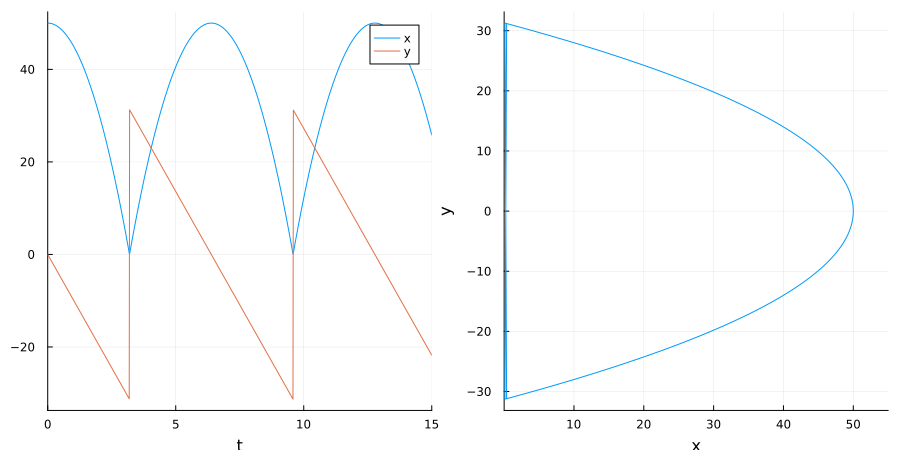

In [15]:
u0 = [50.0,0.0]
tspan = (0.0,15.0)
g = 9.8
prob = ODEProblem(ballhard!,u0,tspan,[g])
sol = solve(prob,callback=ContinuousCallback(infloor,bounce!);)
p1 = plot(sol,labels=["x" "y"])
p2 = plot(sol,idxs=(1,2),label="",xlabel="x",ylabel="y")
plot(p1,p2,layout=(1,2),size = (900,450))

## Bouncing Ball Hard con disipacion

Como caso final vamos a agregar disipacion en el rebote rigido. Aca asumimos que la disipacion de produce solo durante la colision y no por la friccion del aire (no seria dificil en ese caso solo hay que agegar como en el oscilador armonico un termino $-Cy$ en la segunda ecuacion).

En este caso la condicion es la misma se trata simplemente de cambiar la funcion callback para que en lugar de solo cambiar el signo de la velocidad la reduzca un poco, lo cual se logra multiplicandola por un valor menor que 1.0 con signo negativo.

Sin embargo, como cualquiera que vio una bola rebotando sabe, existe un potencial problema porque la cantidad de rebotes se va haciendo cada vez mayor y con intervalos de tiempo cada vez mas cortos. Para evitar que esto de problemas al integrador introducimos una condicion de corte cuando el paso de integracion (integrator.dt) se hace demasiado chico. Esa condicion de corte la introducimos en el nuevo callback **bouncedamped!**:

In [16]:
function bouncedamped!(integrator)
  integrator.u[2] *= -0.9
  if integrator.dt > 1e-12
        set_proposed_dt!(integrator,(integrator.t-integrator.tprev)/100)
    else
        integrator.u[1] = 0
        integrator.u[2] = 0
        integrator.p[1] = 0
    end  
end

bouncedamped! (generic function with 1 method)

┌ Warning: dt(1.4210854715202004e-14) <= dtmin(1.4210854715202004e-14) at t=60.69327367498297. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase C:\Users\Camilo\.julia\packages\SciMLBase\YdLDR\src\integrator_interface.jl:515


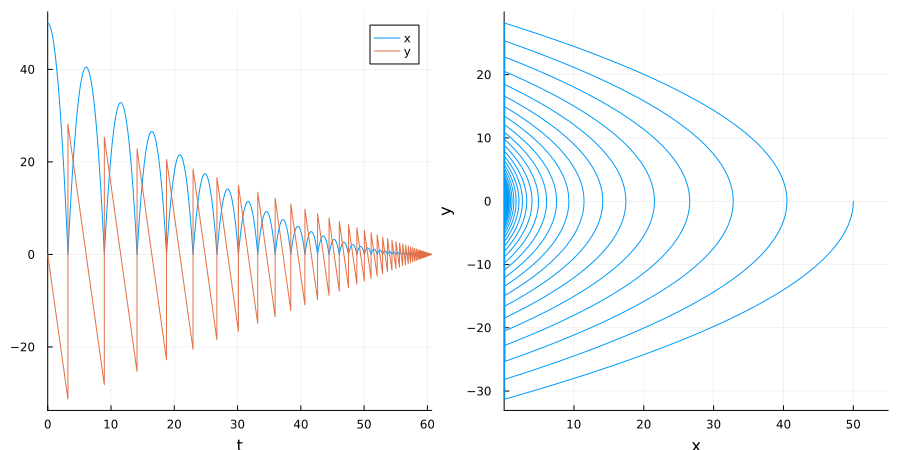

In [17]:
u0 = [50.0,0.0]
tspan = (0.0,70.0)
g = 9.8
prob = ODEProblem(ballhard!,u0,tspan,[g])
sol = solve(prob,callback=ContinuousCallback(infloor,bouncedamped!))
p1 = plot(sol,labels=["x" "y"])
p2 = plot(sol,idxs=(1,2),label="",xlabel="x",ylabel="y")
plot(p1,p2,layout=(1,2),size = (900,450))

# Oscilador No Lineal : Van der Pol

Este es el primer sistema no lineal y lo vamos a ver en clase en mas detalle más adelante. Por ahora, podemos verlo como un oscilador donde la disipación es no lineal y en lugar de C es igual a $C(x^2-1)$
de forma tal que cuando x es menor que 1 la disipacion es **negativa** y actua como una fuente de energia


\begin{aligned}
\dot{x} & = y \\
\dot{y} & =  -Kx-Cy(x^2-1)  
\end{aligned}

In [18]:
function vdp!(du,u,p,t)
    du[1] = u[2]
    du[2] = -p[1]*u[1]-p[2]*u[2]*(u[1]*u[1]-1.0)
    return # no devuelve nada
end    

vdp! (generic function with 1 method)

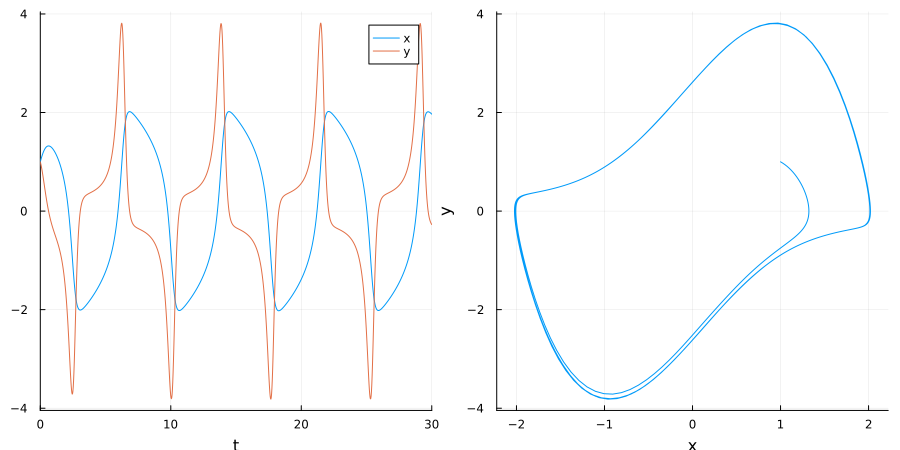

In [19]:
u0 = [1.0,1.0]
tspan = (0.0,30.0)
p = [1.0, 2.0]
prob = ODEProblem(vdp!,u0,tspan,p)
sol = solve(prob)
p1 = plot(sol,labels=["x" "y"])
p2 = plot(sol,idxs=(1,2),label="",xlabel="x",ylabel="y")
plot(p1,p2,layout=(1,2),size = (900,450))

In [20]:
@manipulate throttle=.05 for x0=-1:0.1:1,y0=-1:0.1:1,tmax=10:10:200,K=0:.1:3.0,C=0:0.1:3.0
    prob = ODEProblem(vdp!, [x0; y0], (0, tmax), [K,C])
    sol = solve(prob)
    p1 = plot(sol,labels=["x" "y"])
    p2 = plot(sol,idxs=(1,2),label="",xlabel="x",ylabel="y")
    scatter!(p2,[prob.u0[1]],[prob.u0[2]],label="(x0,y0)")
    plot(p1,p2,layout=(1,2),size = (900,450))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["x0"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000856a1d20, Task (runnable) @0x00000000856a1d20), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"name

In [21]:
N = 50; dt = 0.5
sol = solve(ODEProblem(vdp!, [0.1; 0.1], (0, N*dt), [1.0,1.5]))
p1 = plot(sol,idxs=(1,2),tspan=(0,dt),color=:black,xlims=(-2.2,2.2),ylims=(-4,4),legend=false,size=(400,400));
anim = @animate for n=2:N
    plot!(p1,sol,idxs=(1,2),tspan=((n-1)*dt,n*dt),color=:black);
end;

┌ Info: Saved animation to 
│   fn = C:\Users\Camilo\NonLinearDynamicsCourse\Lectures\files\vanderpol_anim_fps30b.gif
└ @ Plots C:\Users\Camilo\.julia\packages\Plots\AAjgN\src\animation.jl:139


Plots.AnimatedGif("C:\\Users\\Camilo\\NonLinearDynamicsCourse\\Lectures\\files\\vanderpol_anim_fps30b.gif")
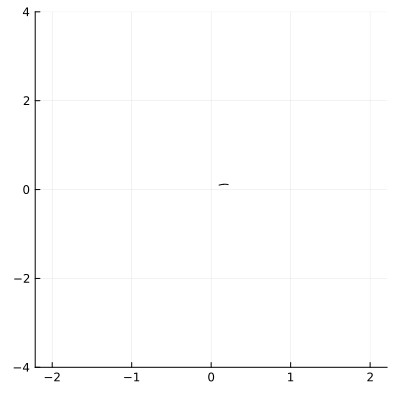

In [22]:
gif(anim, "../files/vanderpol_anim_fps30b.gif", fps = 30)

# Oscilador de Duffing 

Este es otro clásico oscilador no lineal y se puede interpretar como un oscilador en un pozo de potencial doble, pero por ahora lo usamos solo con fines expoloratorios. Tiene un parametro que corresponde a la disipación $\gamma$ y otro parámetro $\beta$ que si pasa de negativo a positivo cambia de tener un equilibrio estable a dos equilibriuos estables (doble pozo de potencial).

$\dot{x} = y$

$\dot{y} = -\gamma y + x (\beta -  x^2) $


In [23]:
function duffing!(du,u,p,t)
    (γ,β) = p
    du[1] = u[2]
    du[2] = -γ*u[2]+u[1]*(β-u[1]*u[1])
    return
end    

duffing! (generic function with 1 method)

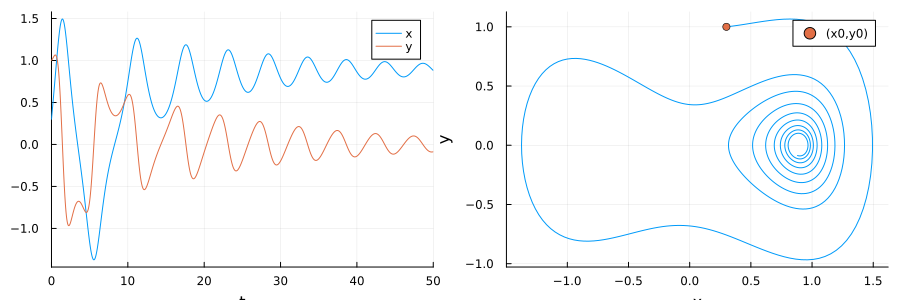

In [24]:
prob = ODEProblem(duffing!, [0.3; 1.0], (0, 50.0), [0.1,0.8])
sol = solve(prob)
p1 = plot(sol,labels=["x" "y"])
p2 = plot(sol,idxs=(1,2),label="",xlabel="x",ylabel="y")
scatter!(p2,[prob.u0[1]],[prob.u0[2]],label="(x0,y0)")
plot(p1,p2,layout=(1,2),size = (900,300))

In [25]:
@manipulate throttle=.05 for x0=-1:0.1:1,y0=-1:0.1:1,tmax=10:10:100,γ=0:.01:3.0,β=-1.0:0.1:3.0
    prob = ODEProblem(duffing!, [x0; y0], (0, tmax), [γ,β])
    sol = solve(prob);
    p1 = plot(sol,labels=["x" "y"])
    p2 = plot(sol,idxs=(1,2),label="",xlabel="x",ylabel="y")
    scatter!(p2,[prob.u0[1]],[prob.u0[2]],label="(x0,y0)")
    plot(p1,p2,layout=(1,2),size = (900,300))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["x0"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000085b3cf90, Task (runnable) @0x0000000085b3cf90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"name

## Multiples trayectorias

Vamos a usar otra herramienta de DifferentialEquations que permite calcular muchas trayectorias simultaneamente (para eso es necesario tener activado el multithreading). 

Tenemos que definir primero un vector $u0\_arr$ con todas las condiciones iniciales, en este caso hacemos una grilla de 6x6 entre -1 y 1.

Luego definimos una funcion **prob_func** que recalcula nuestro problema con la nueva condicion inicial (la forma es estandar, lo que hay que tener presente es que el indice $i$ se refiere al numero de trayectoria)

In [26]:
prob = ODEProblem(duffing!, [0.0; 0.0], (0, 50.0), [0.05,0.5])
u0_arr = vec([[0.2*i-0.5,0.2*j-0.5] for i=0:5, j=0:5])

function prob_func(prob,i,repeat)
  remake(prob,u0=u0_arr[i])
end

prob_func (generic function with 1 method)

Finalmente definimos un **EnsembleProblem** con nuestro problema **prob** y nuestra funcion para redefinirlo **prob_func**, y resolvemos agregando como segundo argumento nuestro Ensemble y como tercer argumento el numero de trayectorias a calcular que hacemos igual al tamaño de nuestro vector de condiciones iniciales $u0\_arr$

  1.330697 seconds (3.74 M allocations: 242.096 MiB, 4.22% gc time, 99.81% compilation time)


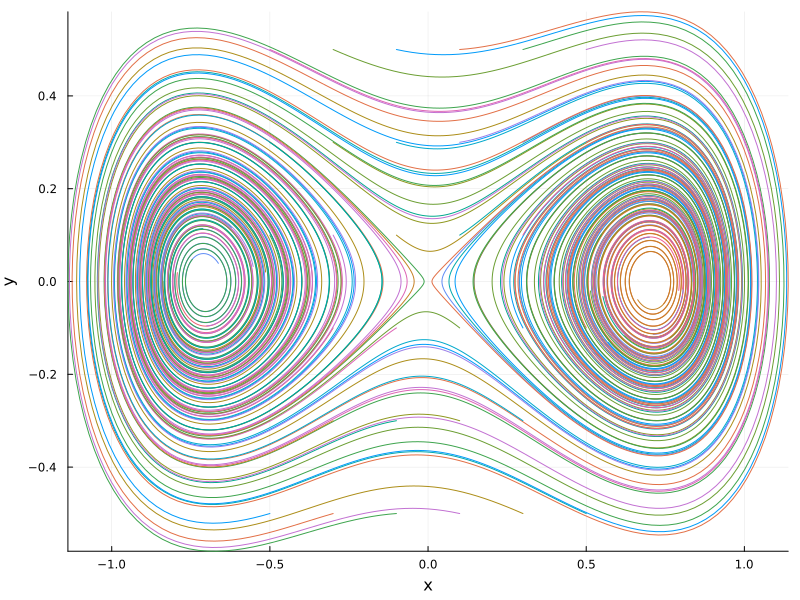

In [27]:
ensemble_prob = EnsembleProblem(prob,prob_func=prob_func)
@time sol = solve(ensemble_prob,EnsembleThreads(),trajectories=length(u0_arr))
plot(sol,idxs=(1,2),xlabel="x",ylabel="y",size = (800,600))

In [28]:
@manipulate throttle=.2 for tmax=10:10:100,γ=0:.02:1.0,β=-1.0:0.1:1.0,grid=3:8
    prob = ODEProblem(duffing!, [0.0; 0.0], (0, tmax), [γ,β])
    u0_arr = vec([[i/grid-0.5,j/grid-0.5] for i=0:grid, j=0:grid])
    function prob_func(prob,i,repeat)
      remake(prob,u0=u0_arr[i])
    end
    ensemble_prob = EnsembleProblem(prob,prob_func=prob_func)
    sol = solve(ensemble_prob,Tsit5(),EnsembleThreads(),trajectories=(length(u0_arr)))
    plot(sol,idxs=(1,2),xlims=(-1.5, 1.5), ylims=(-1.0,1.0),xlabel="x",ylabel="y",size = (900,600))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["tmax"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 10, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
5, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000ceaaab0, Task (runnable) @0x000000000ceaaab0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"10\",\"20\",\"30\",\"40\",\"50\",\"60\",\"70\",\"80\",\"90\",\"100\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"5757786916625007464\",\"id\":\"11423771509152184790\",\"type\":\"observable\"})

# Oscilador de Duffing Forzado Periodicamente

$\dot{x} = y + A\cos (\omega t)$

$\dot{y} = -\gamma y + x(\beta -  x^2) $



In [29]:
function duffingforced!(du,u,p,t)
    (γ,β,A,ω) = p
    du[1] = u[2] 
    du[2] = -γ*u[2]+u[1]*(β-u[1]*u[1])+ A*cos(ω*t)
    return
end    

duffingforced! (generic function with 1 method)

In [30]:
@manipulate throttle=.1 for tmax=10:10:1000,γ=0:.01:3.0,β=-1.0:0.1:3.0,A=0:0.02:1.0,ω=0:0.01:1.0
    prob = ODEProblem(duffingforced!, [0.2; 0.2], (0, tmax), [γ,β,A,ω])
    sol = solve(prob);
    plot(sol,idxs=(1,2),xlabel="x",ylabel="y",size = (900,600))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["tmax"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 100, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
50, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000c8ba4e0, Task (runnable) @0x000000000c8ba4e0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"10\",\"20\",\"30\",\"40\",\"50\",\"60\",\"70\",\"80\",\"90\",\"100\",\"110\",\"120\",\"130\",\"140\",\"150\",\"160\",\"170\",\"180\",\"190\",\"200\",\"210\",\"220\",\"230\",\"240\",\"250\",\"260\",\"270\",\

# CAOS!

# Bouncing Ball en un circulo

Este es uno de los sistemas fisicos mas simples que presenta caos sin un forzado periodico. Se trata de una bola con gravedad en una cavidad circular. A diferencia del bouncing ball original que ocurria en una dimension este sistema fisico es bidimensional, por lo tanto necesitamos cuatro variables para describirlo: la posicion $x$, $y$ y las componentes de la velocidad $v_x$, $v_y$. Las ecuaciones son las mismas del bouncing ball original en la coordenada $y$ y de hecho el sistema parece excesivamente simple:

$\dot{x} = v_x$ 

$\dot{y} = v_y$ 

$\dot{v_x} = 0$ 

$\dot{v_x} = -g$

donde como antes suponemos que la masa es $1$. Lo complejo aca son las condiciones de borde, vamos a considerar una colision "hard", que si suponemos el origen de coordenadas en el centro de la cavidad y el radio de la misma igual a $1$ va a ser cuando se cumpla la condicion:

$x^2+y^2=1$

En ese caso suponemos una colision perfectamente elastica primero y el efecto de la reflexion es invertir la componente normal de la velocidad y conservar la tangencial, es decir si descomponemos el vector velocidad en una componente normal $v_n$ y otra tangencial $v_t$ el vector velocidad reflejado $v_r$ va a ser simplemente

$\vec{v_r} = \vec{v_{t}} - \vec{v_{n}}$

Estas componentes se pueden obtener haciendo el producto escalar con el vector radio unidad al sitio de la colision $(x,y)$
y al vector unidad tangente estos vectores son (en el punto de la colision).

$\hat{n} = (x,y)$

$\hat{t} = (-y,x)$

Entonces el vector resultante escrito en notacion vectorial queda:

$\vec{v_r} = (\vec{v}.\hat{t})\hat{t}-(\vec{v}.\hat{n})\hat{n}$

Escrito en las componentes cartesianas es un poco mas extenso pero no dificil de computar

$v_x \rightarrow v_x(y^2-x^2)-2xyv_y$

$v_y \rightarrow v_y(x^2-y^2)-2xyv_x$

Escribimos las ecuaciones del sistema, la condicion para la colision y la funcion bounce! para cambiar de direccion la velocidad.

In [31]:
function ballcirclehard!(du,u,p,t)
  du[1] = u[3]
  du[2] = u[4]
  du[3] = 0  
  du[4] = -p[1]
  du  
end

ballcirclehard! (generic function with 1 method)

In [32]:
function collision(u,t,integrator)
  1.0-sqrt(u[1]*u[1]+u[2]*u[2])
end

function collision2(u,t,integrator)
  sqrt(u[1]*u[1]+u[2]*u[2])-1.0
end


function bounce!(integrator)
  (x,y,vx,vy) = integrator.u
  integrator.u[3] = vx*(y*y-x*x)-2*x*y*vy
  integrator.u[4] = vy*(x*x-y*y)-2*x*y*vx
end

bounce! (generic function with 1 method)

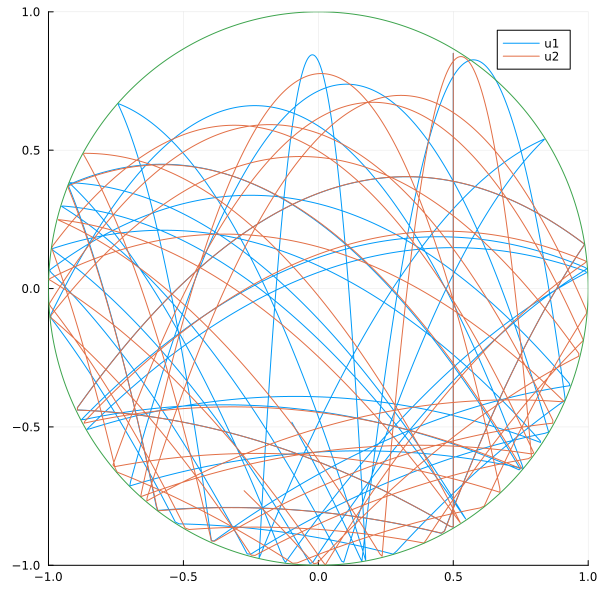

In [33]:
u1 = [0.5,0.85,0.0,0.0]
u2 = [0.5001,0.85,0.0,0.0]
tspan = (0.0,50.0)
g = 1.0
sol1 = solve(ODEProblem(ballcirclehard!,u1,tspan,[g]),callback=ContinuousCallback(collision,bounce!);)
sol2 = solve(ODEProblem(ballcirclehard!,u2,tspan,[g]),callback=ContinuousCallback(collision,bounce!);)
plot(sol1,idxs=(1,2),plotdensity=5000,xlims=(-1,1),ylims=(-1,1),label="u1")
plot!(sol2,idxs=(1,2),plotdensity=5000,xlims=(-1,1),ylims=(-1,1),label="u2")
plot!(cos.(2*pi*(0:0.001:1)),sin.(2*pi*(0:0.001:1)),label="",size=(600,600))

In [34]:
# ATENCION Esto es para hacer la animacion de la clase, puede demorar varios minutos! Se puede disminuir el N o aumentar el dt
N = 500; dt = 0.1
anim = @animate for n=1:N
    p1 = plot(cos.(2*pi*(0:0.001:1)),sin.(2*pi*(0:0.001:1)),color=:black,legend=false,size=(660,600))
    plot!(p1,sol1,idxs=(1,2),tspan=(0,n*dt),plotdensity=200*n,xlims=(-1,1),ylims=(-1,1),color=:red,alpha=0.2)
    #plot!(p1,sol2,idxs=(1,2),tspan=(0,n*dt),plotdensity=200*n,xlims=(-1,1),ylims=(-1,1),color=:blue,alpha=0.2)
    scatter!(p1,sol1,idxs=(1,2),tspan=(n*dt,n*dt),color=:red,markersize=10,alpha=0.5)
    #scatter!(p1,sol2,idxs=(1,2),tspan=(n*dt,n*dt),color=:blue,markersize=10,alpha=0.5)
end;

┌ Info: Saved animation to 
│   fn = C:\Users\Camilo\NonLinearDynamicsCourse\Lectures\files\bouncing_chaos_single.gif
└ @ Plots C:\Users\Camilo\.julia\packages\Plots\AAjgN\src\animation.jl:139


Plots.AnimatedGif("C:\\Users\\Camilo\\NonLinearDynamicsCourse\\Lectures\\files\\bouncing_chaos_single.gif")
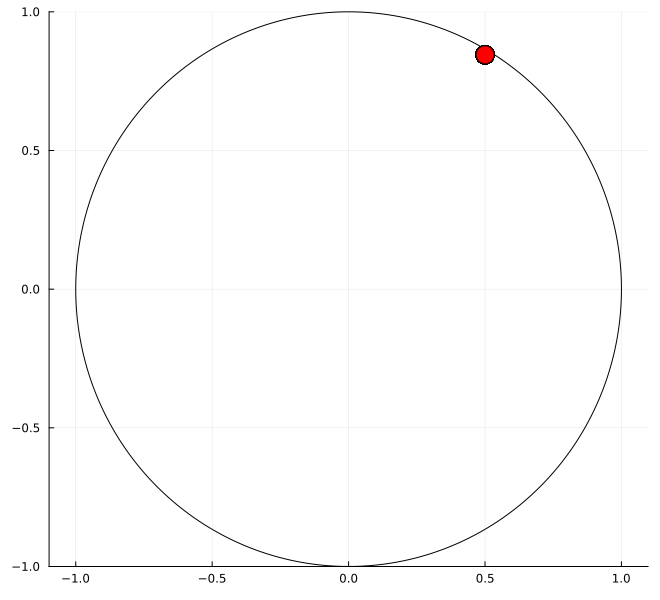

In [35]:
gif(anim, "../files/bouncing_chaos_single.gif", fps = 30)

In [36]:
ts = range(0, stop=20, length=50000)
dd = (sol1(ts,idxs=2)-sol2(ts,idxs=2)).^2+(sol1(ts,idxs=1)-sol2(ts,idxs=1)).^2
plot(ts,0.5*log10.(dd))

LoadError: MethodError: no method matching similar(::Float64, ::Type{Float64})
[0mClosest candidates are:
[0m  similar([91m::Union{LinearAlgebra.Adjoint{T, var"#s885"}, LinearAlgebra.Transpose{T, var"#s885"}} where {T, var"#s885"<:(AbstractVector)}[39m, ::Type{T}) where T at C:\Users\Camilo\AppData\Local\Programs\Julia-1.8.2\share\julia\stdlib\v1.8\LinearAlgebra\src\adjtrans.jl:207
[0m  similar([91m::Union{LinearAlgebra.Adjoint{T, S}, LinearAlgebra.Transpose{T, S}} where {T, S}[39m, ::Type{T}) where T at C:\Users\Camilo\AppData\Local\Programs\Julia-1.8.2\share\julia\stdlib\v1.8\LinearAlgebra\src\adjtrans.jl:211
[0m  similar([91m::Union{LinearAlgebra.Adjoint{T, S}, LinearAlgebra.Transpose{T, S}} where {T, S}[39m, ::Type{T}, [91m::Tuple{Vararg{Int64, N}}[39m) where {T, N} at C:\Users\Camilo\AppData\Local\Programs\Julia-1.8.2\share\julia\stdlib\v1.8\LinearAlgebra\src\adjtrans.jl:212
[0m  ...

# El Problema de los Tres Cuerpos (Restringido)

$\dot{x} = v_x$

$\dot{y} = v_y$

$\dot{v_x} = x + 2 v_y - \mu'(x+\mu)/D_1 - \mu(x-\mu')/D_2 $

$\dot{v_y} = y + 2 v_x - \mu' y/D_1 - \mu y/D_2 $

$D1 = ((x+\mu)^2+y^2)^{3/2}$,       $D2 = ((x-\mu')^2+y^2)^{3/2}$

$\mu' = 1 - \mu $

y con los valores de parametros y condiciones iniciales

$\mu= 0.012277471$

$u_0 = (0.994,0,0,-2.002585106379)$

In [37]:
function threebody!(du,u,p,t)
    D1 = ((u[1]+p[1])*(u[1]+p[1])+u[2]*u[2])^(3/2)
    D2 = ((u[1]-p[2])*(u[1]-p[2])+u[2]*u[2])^(3/2)
    du[1]=u[3]
    du[2]=u[4]
    du[3]=u[1]+2.0*u[4]-p[2]*(u[1]+p[1])/D1-p[1]*(u[1]-p[2])/D2
    du[4]=u[2]-2.0*u[3]-p[2]*u[2]/D1-p[1]*u[2]/D2
    du
end    
    

threebody! (generic function with 1 method)

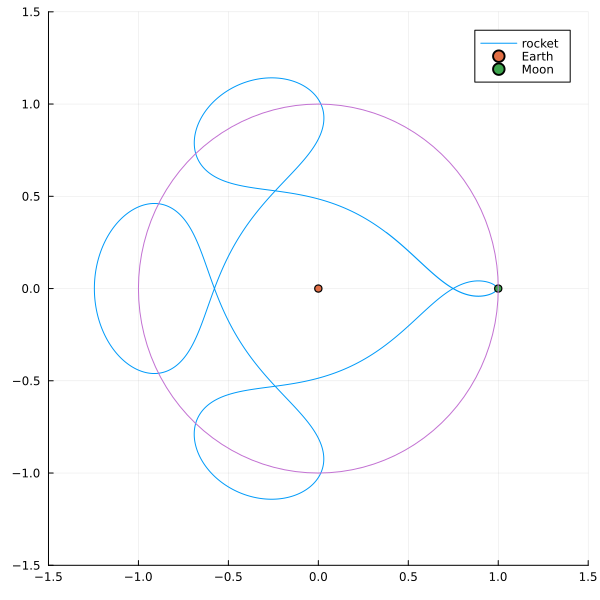

In [38]:
u0 = [0.994,0,0,-2.0015851]
μ = 0.012277471 # Moon
tspan = (0,18.0)
sol = solve(ODEProblem(threebody!,u0,tspan,[μ,1.0-μ]),Vern9());
plot(sol,idxs=(1,2),label="rocket")
scatter!([0],[0],label="Earth")
scatter!([1],[0],label="Moon")
plot!(cos.(2*pi*(0:0.01:1)),sin.(2*pi*(0:0.01:1)),label="",size=(600,600),xlim=(-1.5,1.5),ylim=(-1.5,1.5))

In [39]:
@manipulate throttle=.1 for x0=0.993:0.000005:0.996, vy0=-2.1:0.001:-2
    u0 = [x0,0,0,vy0]
    tspan = (0,20.0)
    sol = solve(ODEProblem(threebody!,u0,tspan,[μ,1.0-μ]),Vern9());
    plot(sol,idxs=(1,2))
    scatter!([0],[0])
    scatter!([1],[0])
    plot!(cos.(2*pi*(0:0.01:1)),sin.(2*pi*(0:0.01:1)),size=(600,600),xlim=(-1.5,1.5),ylim=(-1.5,1.5))
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["x0"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 601, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
301, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008568c7d0, Task (runnable) @0x000000008568c7d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.993\",\"0.993005\",\"0.99301\",\"0.993015\",\"0.99302\",\"0.993025\",\"0.99303\",\"0.993035\",\"0.99304\",\"0.993045\",\"0.99305\",\"0.993055\",\"0.99306\",\"0.993065\",\"0.99307\",\"0.993075\",\"0.99308\"